In [14]:
import pandas as pd
import os
import numpy as np


#df = pd.read_pickle('/scratch/mentalism/data/user_classification/user_age_gender_location.pkl')
df = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age_gender_location.pkl')
#df2 = pd.read_pickle('/g100_work/IscrC_mental/data/user_classification/user_age.pkl')

In [15]:
# clean dataset from bad age regex patterns
np.sort(df.age_when_tweeted.unique())

array([ -6,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 105, 108, 114, 115, 120])

In [20]:
for i in df[df['age_when_tweeted']==-1].tweet:
    print(i)
    print('----------')

@esterviola_ Come scrissi in un pensierino alle elementari “l’autunno è la mia stagione preferita non tanto perché è la stagione in cui sono nato (sono del 19 dicembre ed è ormai quasi inverno) ma perché blah blah blah....”
----------
@EnricoLetta non capite che con tutte queste tasse,imu,tasi, ci state rovinando,sono un 15 che a il padre disperato  perché non trova lavoro
----------
@ggiulss sono un 16 tipo
----------


Clearly the problem are "year of birth" regex like "sono del..." or "sono un..."

In [9]:
# sample from users with image only
df_wi = df[df.user_has_image]

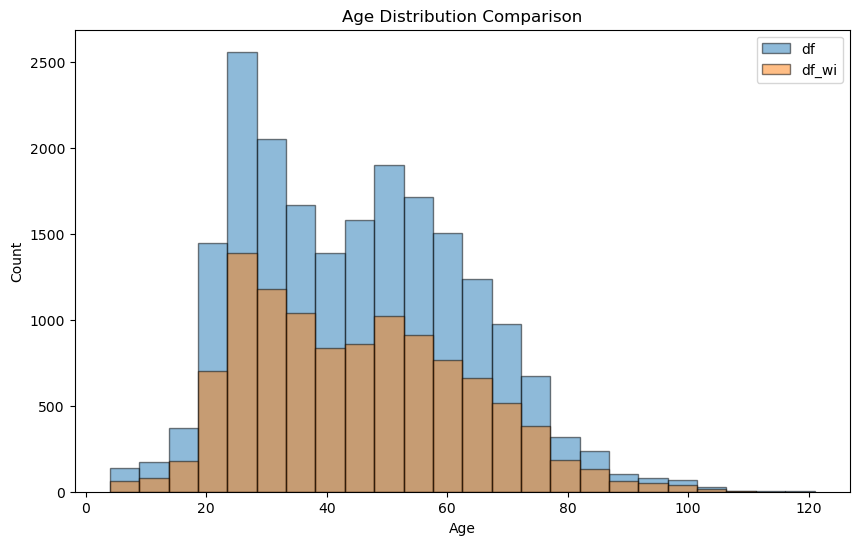

In [10]:
import matplotlib.pyplot as plt

# Assuming df and df_wi are your DataFrames
plt.figure(figsize=(10, 6))

# Plot the histogram for df
plt.hist(df['age_in_2023'], bins=24, edgecolor='k', alpha=0.5, label='df')

# Plot the histogram for df_wi, overlapping with the previous plot
plt.hist(df_wi['age_in_2023'], bins=24, edgecolor='k', alpha=0.5, label='df_wi')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution Comparison')
plt.legend()  # Display the legend to differentiate between the two DataFrames

# Set the x-axis limits to show only values from 0 to 23
#plt.xlim(0, 100)

plt.show()

In [11]:
import numpy as np

np.sort(df.age_when_tweeted.unique())

array([ -6,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 105, 108, 114, 115, 120])

/scratch_local/slurm_job.10842286/ipykernel_47595/1151617322.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['regex_type'] == 'birth_year'][df['regex_idx'] == 1.0].tweet


1        @gabribett @maurorizzi_mr speranza è del '79, ...
23       tipo che mi sembrava strano che dischi così be...
32       @Addioegrazieper anche io sono del 19 giugno! ...
54       Sono del 1969, ultimo anno con bilanciamento t...
59       La presenza di Zelenskyy su Twitter.  Picco di...
                               ...                        
20104    @Antonio20041889 @labrys_ascia @NomeEssere Fab...
20107    @BentivogliMarco Vecchio rimbambito ricordati ...
20109    Purtroppo non ho avuto la fortuna di conoscerl...
20171    @LaStampa Scusate cari giornalisti (si fa per ...
20182    @AndreaOrlandosp Caro Orlando se la sinistra n...
Name: tweet, Length: 1272, dtype: object

In [55]:
df[df['regex_idx'] == 2.0]

,tweet_id,user_id,created_at,tweet,status,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,age_when_tweeted
0,1114454570170814464,22873,2019-04-06 09:07:29+00:00,“C’ho 52 anni e c’ho i fiji dell’età tua!”\n\n...,processed,age_digit,2.0,52.0,2019,56,52
4,1442101928616361984,607833,2021-09-26 12:21:07+00:00,ho appena sentito in TV ad amici un ragazzo pa...,processed,birth_year,2.0,2002.0,2021,21,19
5,1422936470931787520,607983,2021-08-04 15:04:26+00:00,@jesuiscialis Meno male che ho 27 anni.,processed,age_digit,2.0,27.0,2021,29,27
6,614148041642233856,612953,2015-06-25 19:07:58+00:00,"Ciao sono Elio, ho 32 anni e mi sono perso gli...",processed,age_digit,2.0,32.0,2015,40,32
8,225217809767088064,625703,2012-07-17 13:18:04+00:00,"ANSA: ""è l'ansia che fa invecchiare le donne"" ...",processed,age_digit,2.0,90.0,2012,101,90
...,...,...,...,...,...,...,...,...,...,...,...
35103,1638680982386515968,1611997980998901760,2023-03-22 23:16:06+00:00,@maikmontis97 @Paroladilaura @AtlasStudent Ho ...,processed,age_digit,2.0,40.0,2023,40,40
35104,1631964430123651072,1613851501054595073,2023-03-04 10:26:55+00:00,@pdnetwork @bragachiara Ho 63 anni e da quando...,processed,age_digit,2.0,63.0,2023,63,63
35105,1639015893253623808,1615086545035296788,2023-03-23 21:26:55+00:00,"“Sono un pescatore; Ho 22 anni, sono stato pic...",processed,age_digit,2.0,22.0,2023,22,22
35106,1625783554561933312,1616850916753420288,2023-02-15 09:06:19+00:00,@hhembrant Come ti chiami io mi chiamo Gianluc...,processed,age_digit,2.0,47.0,2023,47,47


In [106]:
df.groupby('age_when_tweeted').apply('count')[:20]

,user_id,username,full_name,location,join_year,join_month,join_day,bio,tweets,following,...,is_male,tweet_id,created_at,tweet,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,user_has_image
age_when_tweeted,,,,,,,,,,,,,,,,,,,,,
-6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
3,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39


In [59]:
# compare gender distributions
print(f"male to female ration in full sample: {df['is_male'].value_counts()[0]/df['is_male'].value_counts()[1]}")
print(f"male to female ration in imag sample: {df_wi['is_male'].value_counts()[0]/df_wi['is_male'].value_counts()[1]}")

male to female ration in full sample: 1.7006284262601952
male to female ration in imag sample: 1.7346182357301705


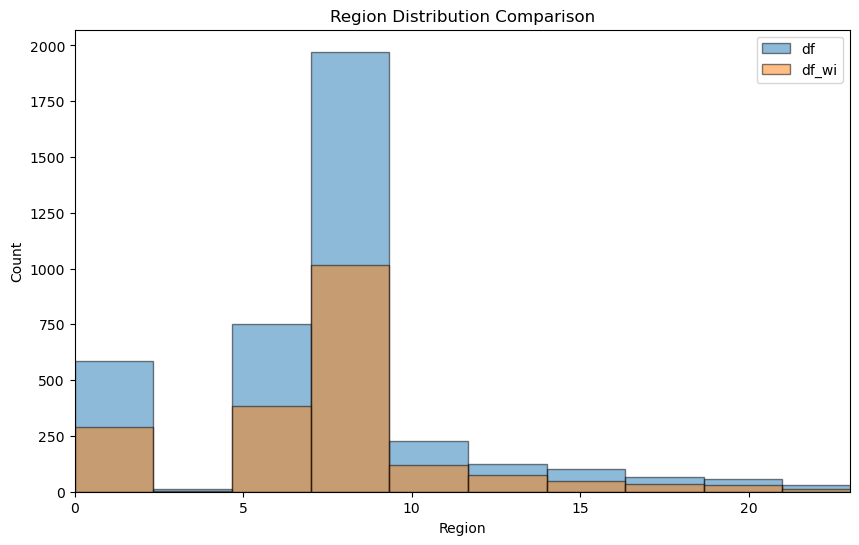

In [60]:
import matplotlib.pyplot as plt

# Assuming df and df_wi are your DataFrames
plt.figure(figsize=(10, 6))

# Plot the histogram for df
plt.hist(df['region_pos'], bins=24, edgecolor='k', alpha=0.5, label='df')

# Plot the histogram for df_wi, overlapping with the previous plot
plt.hist(df_wi['region_pos'], bins=24, edgecolor='k', alpha=0.5, label='df_wi')

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution Comparison')
plt.legend()  # Display the legend to differentiate between the two DataFrames

# Set the x-axis limits to show only values from 0 to 23
plt.xlim(0, 23)

plt.show()


In [85]:
print('ratio empty/nonempty bios in full:', (df.bio == '').astype('int').sum() / (df.bio != '').astype('int').sum())
print('ratio empty/nonempty bios in imag:', (df_wi.bio == '').astype('int').sum() / (df_wi.bio != '').astype('int').sum())

ratio empty/nonempty bios in full: 0.5390124961901859
ratio empty/nonempty bios in imag: 0.5615916466770142


In [86]:
test_set = df_wi.sample(n=1500, random_state=5)

In [87]:
print('ratio empty/nonempty bios in imag:', (test_set.bio == '').astype('int').sum() / (test_set.bio != '').astype('int').sum())
test_set

ratio empty/nonempty bios in imag: 0.5337423312883436


,user_id,username,full_name,location,join_year,join_month,join_day,bio,tweets,following,...,tweet_id,created_at,tweet,regex_type,regex_idx,age_raw,year_tweet,age_in_2023,age_when_tweeted,user_has_image
15074,714484836182974464,Giovanni__79,giovanni,"Campania, Italia",2016,3,28,"Ciò che per noi sarà futuro, per i nostri figl...",1277,547,...,1284838616590622720,2020-07-19 13:12:51+00:00,"@davidealgebris Da chi sei pagato? Ho 40 anni,...",age_digit,2,40,2020,43,40,True
1528,103582085,FedericaDeCaro,federica de caro,"Napoli, Campania",2010,1,10,,5229,205,...,1155957410877493248,2019-07-29 21:44:58+00:00,Ho 30 anni ma potrei averne 20. Come ci si dov...,age_digit,2,30,2019,34,30,True
8775,707720447,ArchRatti,matteo adriano ratti,Architetto,2013,10,10,PROGETTANDO SANATORIE,184,1038,...,978361397783531520,2018-03-26 20:01:48+00:00,@MrETP @guffanti_marco @Artgiuliafoschi @borgh...,birth_year,1,2016,2018,7,2,True
11081,1416351444,lanasmonkey,martina,Italia,2013,5,9,A̶m̶o̶r̶ ̶v̶i̶n̶c̶i̶t̶ ̶o̶m̶n̶i̶a̶,16794,2409,...,572487740069163008,2015-03-02 20:04:48+00:00,"ho 16 anni, oddio sono vecchia. \r\nridatemi l...",age_digit,2,16,2015,24,16,True
12237,2320069527,marco_dvt,marco,,2014,2,2,"Commento ciò che mi va, 📺🎤 ma so anche astenermi🧐",2294,769,...,1489758236827951104,2022-02-05 00:30:16+00:00,Ho vent’anni in meno del più giovane dei due è...,age_chars,2,20,2022,21,20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1037714689,MAURIZIOUGO,maurizio ugo,,2012,12,26,,13,2,...,331182457745440768,2013-05-05 23:03:45+00:00,@SBerlusconi2013 vogliamo posti di lavoro e no...,age_digit,2,59,2013,69,59,True
15861,835851749491625987,5265Michele,michele,Italia,2017,2,26,,13,90,...,949961901949247360,2018-01-07 11:12:21+00:00,@fattoquotidiano Io ho 53 anni e voto m5,age_digit,2,53,2018,58,53,True
14643,4217493898,maria_fedi,maria cristina fedi,,2015,11,18,,33,19,...,753873977341247360,2016-07-15 08:48:57+00:00,@Cesare_Damiano @LavoroWelfare @TNannicini ho6...,age_digit,2,65,2016,72,65,True
7822,540169024,AngeloRossomand,angelo rossomando,"Teggiano, Campania",2012,3,29,,457,152,...,1030336053843033984,2018-08-17 06:10:32+00:00,@GassmanGassmann Tutto il mio rispetto per i V...,age_digit,2,42,2018,47,42,True


In [88]:
test_set.to_pickle('/scratch/mentalism/data/user_classification/user_age_gender_location_manual_eval.pkl')

In [117]:
test_set.columns

Index(['user_id', 'username', 'full_name', 'location', 'join_year',
       'join_month', 'join_day', 'bio', 'tweets', 'following', 'followers',
       'likes', 'loc_count', 'location_clean', 'foreign_country',
       'all_regions', 'region_pos', 'region', 'term_for_italy',
       'name_city_engl', 'condition', 'city_id', 'all_cities', 'city_pos',
       'region_code', 'is_male', 'tweet_id', 'created_at', 'tweet',
       'regex_type', 'regex_idx', 'age_raw', 'year_tweet', 'age_in_2023',
       'age_when_tweeted', 'user_has_image'],
      dtype='object')

In [21]:
for i in range(10):
    print(df.iloc[i]['tweet'])
    print(df.iloc[i]['created_at'])
    print(df.iloc[i]['age_in_2023'])
    print('------------------------------------')
    

“C’ho 52 anni e c’ho i fiji dell’età tua!”

Mi vergogno da quasi coetaneo. A mio figlio e i suoi compagni non parlerei mai con quel tono minaccio a 2 centimetri dal naso.

Grande #Simone. #Daje! https://t.co/IzGVgP3N1r
2019-04-06 09:07:29+00:00
56
------------------------------------
Io oggi compio 46 anni, voi invece che scuse avete?
2020-07-07 10:24:17+00:00
49
------------------------------------
@gabribett @maurorizzi_mr speranza è del '79, io sono del '78 e ho l'appuntamento il primo luglio. per ora i politici hanno tutti seguito l'ordine per fascia d'età. ci sta che non sia ancora vaccinato.
2021-06-16 14:45:40+00:00
45
------------------------------------
Oggi compio 45 anni, ma sono in ottima compagnia perché oggi compie gli anni anche @LCuccarini! Auguri! 🎉🎉🎉
2019-08-10 15:10:02+00:00
49
------------------------------------
ho appena sentito in TV ad amici un ragazzo parlare da grande saggio sulle sue possibilità di crescita professionale dandosi per spacciato perché più grand

In [ ]:
AGE_CHAR = [
    ‘novantanove’,
    ‘novantotto’,
    ‘novantasette’,
    ‘novantasei’,
    ‘novantacinque’,
    ‘novantaquattro’,
    ‘novantatre’,
    ‘novantadue’,
    ‘novantuno’,
    ‘novanta’,
    ‘ottantanove’,
    ‘ottantotto’,
    ‘ottantasette’,
    ‘ottantasei’,
    ‘ottantacinque’,
    ‘ottantaquattro’,
    ‘ottantatre’,
    ‘ottantadue’,
    ‘ottantuno’,
    ‘ottanta’,
    ‘settantanove’,
    ‘settantotto’,
    ‘settantasette’,
    ‘settantasei’,
    ‘settantacinque’,
    ‘settantaquattro’,
    ‘settantatre’,
    ‘settantadue’,
    ‘settantuno’,
    ‘settanta’,
    ‘sessantanove’,
    ‘sessantotto’,
    ‘sessantasette’,
    ‘sessantasei’,
    ‘sessantacinque’,
    ‘sessantaquattro’,
    ‘sessantatre’,
    ‘sessantadue’,
    ‘sessantuno’,
    ‘sessanta’,
    ‘cinquantanove’,
    ‘cinquantotto’,
    ‘cinquantasette’,
    ‘cinquantasei’,
    ‘cinquantacinque’,
    ‘cinquantaquattro’,
    ‘cinquantatre’,
    ‘cinquantadue’,
    ‘cinquantuno’,
    ‘cinquanta’,
    ‘quarantanove’,
    ‘quarantotto’,
    ‘quarantasette’,
    ‘quarantasei’,
    ‘quarantacinque’,
    ‘quarantaquattro’,
    ‘quarantatre’,
    ‘quarantadue’,
    ‘quarantuno’,
    ‘quaranta’,
    ‘trentanove’,
    ‘trentotto’,
    ‘trentasette’,
    ‘trentasei’,
    ‘trentacinque’,
    ‘trentaquattro’,
    ‘trentatre’,
    ‘trentadue’,
    ‘trentuno’,
    ‘trenta’,
    ‘ventinove’,
    ‘ventotto’,
    ‘ventisette’,
    ‘ventisei’,
    ‘venticinque’,
    ‘ventiquattro’,
    ‘ventitre’,
    ‘ventidue’,
    ‘ventuno’,
    ‘venti’,
    ‘diciannove’,
    ‘diciotto’,
    ‘diciassette’,
    ‘sedici’,
    ‘quindici’,
    ‘quattordici’,
    ‘tredici’
 ]
# remove last letter of each years_in_words entry, in order to match both
# the noun ("ventiquattro") and the adjective ("ventiquattrenne")
AGE_CHAR_SUFFIX_LONG = [year[:-1] for year in AGE_CHAR]
# keep only the shortest form as a first filter
AGE_CHAR_SUFFIX_SHORT = [
    "tredic",
    "quattordic",
    "quindic",
    "sedic",
    "diciasset",
    "diciott",
    "diciannov",
    "vent",
    "trent",
    "quarant",
    "cinquant",
    "sessant",
    "settant",
    "ottant",
    "novant",
]
AGE_DIGIT = list(range(99,12,-1))
# List of regex patterns for matching Twitter posts mentioning the age of the user
# The patterns are built using the age expressed in digits (e.g. "22" for 22)
AGE_DIGIT_PATTERNS = [
    # Matches phrases like "ho compiuto 22 anni" (I just turned 22)
    # but not "quando ho compiuto 22 anni" (when I turned 22)
    # nor "ho compiuto 22 anni di/de" (I have 22 years of)
    r"(?<!quando\s)(?<!quando)ho\s*compiuto\s*(\d{2})\s*anni(?! de)(?! di)(?!de)(?!di)(?! in più)(?! in meno)",
    r"\bcompio\s*(\d{2})\s*anni(?! de)(?! di)(?!de)(?!di)",
    # Matches phrases like "ho 22 anni" (I am 22 years old)
    # but not "da quando/non ho 22 anni" (since I am / I am not 22 years old)
    # nor "ho 22 anni di/de" (I have 22 years of)
    # nor "se ho 22 anni" (if I am 22 years old)
    r"(?<!quando\s)(?<!quando)(?<!non\s)(?<!non)(?<!se\s)(?<!se)ho\s*(\d{2})\s*anni(?! de)(?!de)(?! di)(?!di)(?! in più)(?! in meno)",
    # Matches phrases like "faccio 22 anni" (I am turning 22 years old)
    # but not "faccio 22 anni di/de" (I have 22 years of)
    r"\bfaccio\s*(\d{2})\s*anni(?! de)(?! di)(?!de)(?!di)",
    # Matches phrases like "spengo 22 candeline" (I am blowing 22 candles)
    r"\bspengo\s*(\d{2})\s*candeline",
    # Matches phrases like "il mio 22^ compleanno" (my 22nd birthday)
    r"il\s*mio\s*(\d{2})\^\s*comple(?:anno)?",
    # Matches phrases like "sono un 22enne" (I am a 22-year-old...)
    r"\bsono\s*una?\s*(\d{2})\s*enne",
    # Matches phrases like "i miei 22 anni" (my 22 years)
    # r"\bmiei\s*(\d{2})\s*anni",
]
def return_full_age_char_pattern(age_char):
    """
    Returns a list of regex patterns for matching Twitter posts mentioning the age of the user.
    The patterns are built using the age_char parameter, which is a string containing the
    Italian word for the age of the user (e.g. "ventidue" for 22).
    """
    age_char_patterns = [
            # Matches phrases like "ho compiuto ventidue anni" (I just turned twenty-two)
            # but not "quando ho compiuto ventidue anni" (when I turned twenty-two)
            # nor "ho compiuto ventidue anni di/de" (I have twenty-two years of)
            r"(?<!quando\s)(?<!quando)ho\s*compiuto\s*({}).*\s*anni(?! de)(?!de)(?! di)(?!di)(?! in più)(?! in meno)".format(age_char),
            r"\bcompio\s*({}).*\s*anni(?! de)(?! di)(?!de)(?!di)".format(age_char),
            # Matches phrases like "ho ventidue anni" (I am twenty-two years old),
            # but not "a quando/non ho ventidue anni" (since I am / I am not twenty-two years old)
            # nor "ho ventidue anni di/de" (I have twenty-two years of)
            # nor "se ho ventidue anni" (if I am twenty-two years old)
            r"(?<!quando\s)(?<!quando)(?<!non\s)(?<!non)(?<!se\s)(?<!se)ho\s*({}).*\s*anni(?! de)(?! di)(?!de)(?!di)(?! in più)(?! in meno)".format(age_char),
            # Matches phrases like "faccio ventidue anni" (I am turning twenty-two years old)
            r"\bfaccio\s*({}).*\s*anni(?! de)(?! di)(?!de)(?!di)".format(age_char),
            # Matches phrases like "spengo ventidue candeline" (I am blowing twenty-two candles)
            r"\bspengo\s*({})\s*candeline".format(age_char),
            # Matches phrases like "mio ventiduesimo comple/compleanno" (my twenty-second birthday)
            r"il\s*mio\s*{}e?simo\s*comple(?:anno)?".format(age_char),
            # Matches phrases like "sono un ventiduenne" (I am twenty-two-years-old...)
            r"\bsono\s*una?\s*({})\s*e?nne".format(age_char),
            # Matches phrases like "i miei ventidue anni" (my twenty-two years)
            # r"\bmiei\s*({}).*\s*anni".format(age_char),
        ]
    return age_char_patterns
def tweet_user_age(tweet):
    """
    Returns the age of the user who posted the tweet, if the tweet contains a mention of the user’s age.
    TODO: the age returned by this function should be compared with the creation date of the tweet.
    """
    if len(tweet) > 0:
        # check if the tweet contains a double digit number, but not in a quoted text
        if re.search(r"\d{2}", tweet):
            if not re.search(r"\".*\d{2}.*\"", tweet) \
                and not re.search(r"\".*\d{2}.*\"", tweet) \
                and not re.search(r"\«.*\d{2}.*\»", tweet):
                # search for age patterns
                for i, pattern in enumerate(AGE_DIGIT_PATTERNS):
                    matches = re.findall(pattern, tweet, flags=re.IGNORECASE)
                    if matches:
                        return {"tweet": tweet, "age": int(matches[0]), "regex_idx": i}
        # check if the tweet contains an age expressed in characters
        if re.search(r"{}".format("|".join(AGE_CHAR_SUFFIX_SHORT)), tweet, flags=re.IGNORECASE):
            # check what age is expressed in the tweet and retrieve its index
            matching_age_char = re.findall(r"{}".format("|".join(AGE_CHAR_SUFFIX_LONG)), tweet, flags=re.IGNORECASE)[0].lower()
            matching_age_char_index = AGE_CHAR_SUFFIX_LONG.index(matching_age_char)
            # check if the age is not in a quoted text
            if not re.search(r"\".*{}.*\"".format(matching_age_char), tweet, flags=re.IGNORECASE) \
                and not re.search(r"\".*{}.*\"".format(matching_age_char), tweet, flags=re.IGNORECASE) \
                and not re.search(r"\«.*{}.*\»".format(matching_age_char), tweet, flags=re.IGNORECASE):
                # check if also the full form of the age is present in the tweet
                if re.search(r"{}".format(AGE_CHAR[matching_age_char_index]), tweet, flags=re.IGNORECASE):
                    patterns = return_full_age_char_pattern(AGE_CHAR[matching_age_char_index])
                else:
                    patterns = return_full_age_char_pattern(AGE_CHAR_SUFFIX_LONG[matching_age_char_index])
                # search for age statements and retrieve age
                for i, pattern in enumerate(patterns):
                    matches = re.findall(pattern, tweet, flags=re.IGNORECASE)
                    if matches:
                        return {"tweet": tweet, "age": int(AGE_DIGIT[matching_age_char_index]), "regex_idx": i}
    return {"tweet": tweet, "age": None, "regex_idx": None}




